In [1]:
import os
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
class MultilinearRegression():
    def __init__(self,location):
        try:
            self.df = pd.read_csv(location)
            self.encoder = LabelEncoder()
            self.df['Location'] = self.encoder.fit_transform(self.df['Location'])
            self.df['Garage'] = self.encoder.fit_transform(self.df['Garage'])
            self.df['Condition'] = self.encoder.fit_transform(self.df['Condition'])
            self.df = self.df.drop(columns = ['Id'],axis = 1)
            self.X = self.df.drop(columns = ['Price'],axis=1)
            self.y = self.df['Price'].astype(int)
            print("Data loaded successfully:")
            print(self.df.head())
        except Exception as e:
            print(f'Error occured in init method is: {e}')
    print(f"<-------------------------------------------->")
    def train_model(self):
        try:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=20)
        except Exception as e:
            print(f'Error occured in train model method is: {e}')
    def linear_regression(self):
        try:
            print("\n------ Linear Regression ------")
            self.reg = LinearRegression()
            self.reg.fit(self.X_train, self.y_train)
            self.y_train_pred = self.reg.predict(self.X_train)
            self.y_test_pred = self.reg.predict(self.X_test)
            print(f"reg coef are :[{self.reg.coef_}]")
            print(f"reg intercept is :{self.reg.intercept_}")
            print("\n---------------------------------------\n")
            print(f"Train r2_score is :{r2_score(self.y_train,self.y_train_pred):.4f}")
            print(f"Train mean_squared_error is :{mean_squared_error(self.y_train,self.y_train_pred):.4f}")
            print("\n---------------------------------------\n")
            print(f"Test r2_score is :{r2_score(self.y_test,self.y_test_pred):.4f}")
            print(f"Test mean_squared_error is :{mean_squared_error(self.y_test,self.y_test_pred):.4f}")
        except Exception as e:
            print(f'Error occured in linear_regression method is: {e}')
        print("\n---------------------------------------\n")
    def lasso_regression(self):
        try:
            print("\n------ Lasso Regression ------")
            self.reg2 = Lasso(alpha = 5)
            self.reg2.fit(self.X_train, self.y_train)
            self.y_train_pred = self.reg2.predict(self.X_train)
            self.y_test_pred = self.reg2.predict(self.X_test)
            print(f"reg coef are :[{self.reg2.coef_}]")
            print(f"reg intercept is :{self.reg2.intercept_}")
            print("\n---------------------------------------\n")
            print(f"Train r2_score is :{r2_score(self.y_train,self.y_train_pred):.4f}")
            print(f"Train mean_squared_error is :{mean_squared_error(self.y_train,self.y_train_pred):.4f}")
            print("\n---------------------------------------\n")
            print(f"Test r2_score is :{r2_score(self.y_test,self.y_test_pred):.4f}")
            print(f"Test mean_squared_error is :{mean_squared_error(self.y_test,self.y_test_pred):.4f}")
        except Exception as e:
            print(f'Error occured in lasso_regression method is: {e}')
        print("\n---------------------------------------\n")
    def ridge_regression(self):
        try:
            print("\n------ Ridge Regression ------")
            self.reg1 = Ridge(alpha=4)
            self.reg1.fit(self.X_train, self.y_train)
            self.y_train_pred = self.reg1.predict(self.X_train)
            self.y_test_pred = self.reg1.predict(self.X_test)
            print(f"reg coef are :[{self.reg1.coef_}]")
            print(f"reg intercept is :{self.reg1.intercept_}")
            print("\n---------------------------------------\n")
            print(f"Train r2_score is :{r2_score(self.y_train,self.y_train_pred):.4f}")
            print(f"Train mean_squared_error is :{mean_squared_error(self.y_train,self.y_train_pred):.4f}")
            print("\n---------------------------------------\n")
            print(f"Test r2_score is :{r2_score(self.y_test,self.y_test_pred):.4f}")
            print(f"Test mean_squared_error is :{mean_squared_error(self.y_test,self.y_test_pred):.4f}")
        except Exception as e:
            print(f'Error occured in ridge_regression method is: {e}')
        print("\n---------------------------------------\n")
    def compare_models(self):
        try:
            compare = pd.DataFrame()
            compare['LR_coef'] = self.reg.coef_
            compare['Ridge_coef'] = self.reg1.coef_
            compare['Lasso_coef'] = self.reg2.coef_
            print("\n------ Model Coefficient Comparison ------")
            print(compare)
        except Exception as e:
            print(f'Error occured in comapare_models method is: {e}')
        print("\n---------------------------------------\n")
if __name__ == "__main__":
        try:
            obj = MultilinearRegression('House Price Prediction Dataset.csv')
            obj.train_model()
            obj.linear_regression()
            obj.lasso_regression()
            obj.ridge_regression()
            obj.compare_models()
        except Exception as e:
            print(f'Error :{e}')

<-------------------------------------------->
Data loaded successfully:
   Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  Garage  \
0  1360         5          4       3       1970         0          0       0   
1  4272         5          4       3       1958         0          0       0   
2  3592         2          2       3       1938         0          2       0   
3   966         4          2       2       1902         2          1       1   
4  4926         1          4       2       1975         0          1       1   

    Price  
0  149919  
1  424998  
2  266746  
3  244020  
4  636056  

------ Linear Regression ------
reg coef are :[[ 3.54466071e+00 -2.50734341e+03 -2.54166877e+03  1.61147761e+04
  2.58587737e+02  5.87824626e+01 -7.92452281e+03  4.23577854e+03]]
reg intercept is :15873.060506602982

---------------------------------------

Train r2_score is :0.0047
Train mean_squared_error is :75655403880.8248

---------------------------------------

T

In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('House Price Prediction Dataset.csv')
df.head(4)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020


In [4]:
df.dtypes

,0
Id,int64
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object
Price,int64


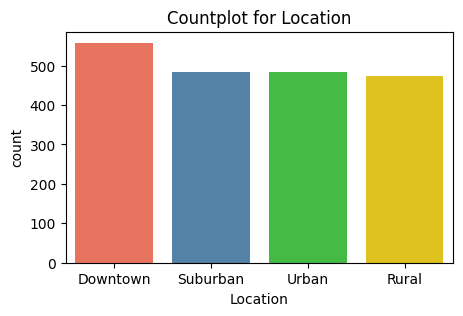

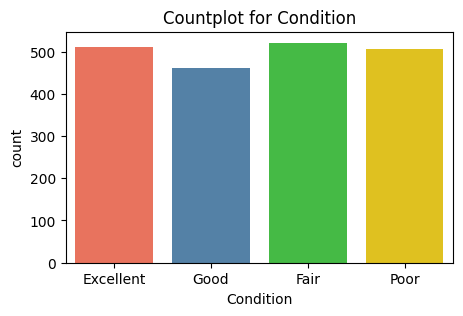

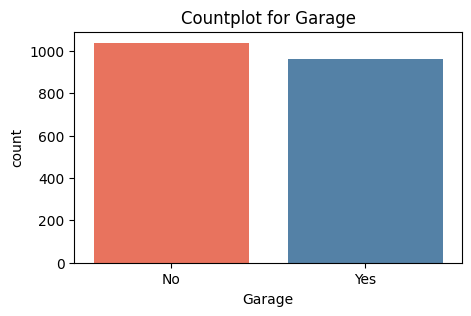

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
for col in df:
    if df[col].dtype == 'object':
        plt.figure(figsize=(5, 3))
        sns.countplot(data=df, x=col,palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])
        plt.title(f'Countplot for {col}')
        plt.show()

In [6]:
df.shape


(2000, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [8]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [9]:
df['Location'].value_counts()

,count
Location,
Downtown,558
Urban,485
Suburban,483
Rural,474


In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])
df['Garage'] = encoder.fit_transform(df['Garage'])
df['Condition'] = encoder.fit_transform(df['Condition'])

In [11]:
df = df.drop(columns = ['Id'],axis = 1)
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,0,0,0,149919
1,4272,5,4,3,1958,0,0,0,424998
2,3592,2,2,3,1938,0,2,0,266746
3,966,4,2,2,1902,2,1,1,244020
4,4926,1,4,2,1975,0,1,1,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,2,3,0,295620
1996,3046,5,2,1,2019,2,3,1,580929
1997,1062,5,1,2,1903,1,3,0,476925
1998,4062,3,1,2,1936,3,0,1,161119


In [12]:
X = df.drop(columns = ['Price'],axis = 1)
y = df['Price']

In [13]:
X.head(2)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage
0,1360,5,4,3,1970,0,0,0
1,4272,5,4,3,1958,0,0,0


In [14]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [16]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(1600, 1600, 400, 400)

In [17]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
reg.coef_

array([ 3.54466071e+00, -2.50734341e+03, -2.54166877e+03,  1.61147761e+04,
        2.58587737e+02,  5.87824626e+01, -7.92452281e+03,  4.23577854e+03])

In [19]:
reg.intercept_

15873.060506602982

In [20]:
import pandas as pd
compare = pd.DataFrame()
compare['LR_coef'] = reg.coef_
compare

,LR_coef
0,3.544661
1,-2507.343414
2,-2541.668769
3,16114.776132
4,258.587737
5,58.782463
6,-7924.522805
7,4235.778537


In [21]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [22]:
y_train_pred

array([551595.04020486, 577229.32147057, 535377.90330153, ...,
       531452.28863256, 556080.61657187, 552993.94314156])

In [23]:
Training_data_Performance = pd.DataFrame()
Training_data_Performance = X_train.copy()
Training_data_Performance['Actual_y_train'] = y_train.copy()
Training_data_Performance['y_train_pred'] = y_train_pred


Training_data_Performance

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Actual_y_train,y_train_pred
1500,2297,3,1,1,2000,2,0,1,420714,551595.040205
451,3722,1,3,2,2018,0,0,1,718582,577229.321471
1627,1203,1,3,3,1936,3,3,0,289317,535377.903302
669,2625,3,3,2,1916,0,2,0,92311,521865.368552
1567,1119,3,3,3,1987,3,0,0,520917,567027.007963
...,...,...,...,...,...,...,...,...,...,...
924,3712,1,3,2,1922,3,3,0,910587,524536.452573
1247,1824,3,1,1,1906,2,0,1,235217,525611.168437
271,627,5,2,2,1943,0,1,1,983671,531452.288633
474,1888,3,3,3,1965,2,1,0,319072,556080.616572


In [24]:
r2_score(y_train,y_train_pred)

0.004742593587493293

In [25]:
r2_score(y_test,y_test_pred)

-0.012000476764142842

In [26]:
mean_squared_error(y_train,y_train_pred)

75655403880.82477

In [27]:
mean_squared_error(y_test,y_test_pred)

78460736839.17273

In [28]:
from sklearn.linear_model import Ridge, Lasso
reg1 = Ridge(alpha = 4)
reg1.fit(X_train,y_train)

Ridge(alpha=4)

In [29]:
reg2 = Lasso(alpha = 4)
reg2.fit(X_train,y_train)

Lasso(alpha=4)

In [30]:
reg1.coef_

array([ 3.54400861e+00, -2.50449618e+03, -2.53593757e+03,  1.60519299e+04,
        2.58555038e+02,  5.93136043e+01, -7.90692685e+03,  4.19204860e+03])

In [31]:
reg2.coef_

array([ 3.54439204e+00, -2.50555304e+03, -2.53842201e+03,  1.61083408e+04,
        2.58576942e+02,  5.57400851e+01, -7.92099016e+03,  4.21968344e+03])

In [32]:
import pandas as pd
compare = pd.DataFrame()
compare['LR_coef'] = reg.coef_
compare['Ridge_coef'] = reg1.coef_
compare['Lasso_coef'] = reg2.coef_
compare

,LR_coef,Ridge_coef,Lasso_coef
0,3.544661,3.544009,3.544392
1,-2507.343414,-2504.496182,-2505.553036
2,-2541.668769,-2535.937572,-2538.422011
3,16114.776132,16051.929886,16108.340781
4,258.587737,258.555038,258.576942
5,58.782463,59.313604,55.740085
6,-7924.522805,-7906.926850,-7920.990156
7,4235.778537,4192.048595,4219.683439


In [33]:
print(df.dtypes)

Area         int64
Bedrooms     int64
Bathrooms    int64
Floors       int64
YearBuilt    int64
Location     int64
Condition    int64
Garage       int64
Price        int64
dtype: object
